<a href="https://colab.research.google.com/github/4gzjw4dq7h-coder/SDRIS-Simulation-Library/blob/main/Kopie_von_genesis_sim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Starting Genesis Simulation...
Step 1: Nodes 3, Edges 2
Step 2: Nodes 5, Edges 4
Step 3: Nodes 9, Edges 10
Step 4: Nodes 17, Edges 24
Step 5: Nodes 33, Edges 62
Step 6: Nodes 63, Edges 144
Step 7: Nodes 119, Edges 291
Step 8: Nodes 227, Edges 548
Generating Plot...


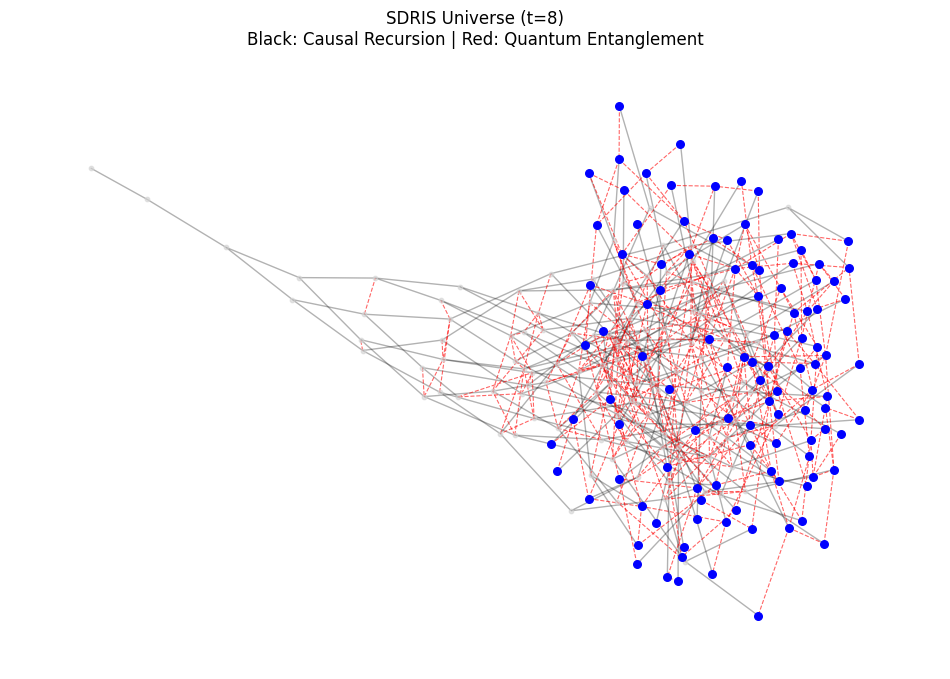

In [ ]:
import networkx as nx
import random
import math
import matplotlib.pyplot as plt

class SDRIS_Universe:
    def __init__(self, p=2, p_fork=0.9, p_link=0.15):
        """
        Initialize the Primal State (Big Bang).
        p: The branching factor (Fundamental Recursion Base, usually 2)
        p_fork: Probability of a node spawning offspring (Expansion)
        p_link: Probability of forming lateral entanglement (Quantum Links)
        """
        self.graph = nx.Graph()
        self.root_id = "0"
        self.graph.add_node(self.root_id, depth=0, active=True)
        self.active_nodes = [self.root_id]

        # Simulation Parameters
        self.p = p
        self.p_fork = p_fork
        self.p_link = p_link
        self.time_step = 0

    def get_padic_distance(self, node1, node2):
        """
        Calculates p-adic distance based on Lowest Common Ancestor (LCA).
        Ref: Paper 5, Eq 1: delta = p^(-Depth(LCA))
        """
        try:
            lca = nx.lowest_common_ancestor(self.graph, node1, node2)
            # Approximate depth by string length of ID (minus dots and offset)
            # Simplified for execution: using logic that deeper strings are longer
            depth_lca = len(str(lca))
            return self.p ** (-depth_lca)
        except:
            return 1.0 # Maximum distance if disconnected

    def step(self):
        """
        Executes one Recursive Update Cycle (R).
        Corresponds to Listing 1 in Paper 17.
        """
        self.time_step += 1
        new_nodes = []

        # --- PHASE 1: FORK (Expansion/Time Arrow) ---
        # Source: Paper 17, Section 2.1
        for node in self.active_nodes:
            if random.random() < self.p_fork:
                # Spawn p children
                for i in range(self.p):
                    child_id = f"{node}.{i}" # Hierarchical ID (e.g., 0.1.0)
                    self.graph.add_node(child_id, depth=self.time_step, active=True)
                    self.graph.add_edge(node, child_id, type='recursive')
                    new_nodes.append(child_id)

            # The parent node becomes 'static' (past), only children are active (present)
            # This enforces the "Surface of the Present"
            self.graph.nodes[node]['active'] = False

        # --- PHASE 2: LINK (Entanglement/Space) ---
        # Source: Paper 17, Section 2.1
        # New nodes form lateral connections based on p-adic proximity
        for i, n1 in enumerate(new_nodes):
            # We check a subset of other new nodes to save compute (Small World assumption)
            potential_neighbors = random.sample(new_nodes, min(len(new_nodes), 10))

            for n2 in potential_neighbors:
                if n1 == n2: continue

                # Calculate p-adic distance (Paper 5)
                dist = self.get_padic_distance(n1, n2)

                # Probability of linking is inversely proportional to p-adic distance?
                # Or is it high if distance is low (close in tree)?
                # "Entangled particles are 'neighbors' in p-adic metric" [Paper 5]
                # Thus, closer p-adic distance = Higher Link Probability.
                if dist > 0 and random.random() < (self.p_link / dist):
                    self.graph.add_edge(n1, n2, type='entanglement')

        # Update active list
        if new_nodes:
            self.active_nodes = new_nodes

        print(f"Step {self.time_step}: Nodes {self.graph.number_of_nodes()}, Edges {self.graph.number_of_edges()}")

    def measure_spectral_dimension(self, walkers=50, steps=100):
        """
        Calculates the Spectral Dimension d_S via Random Walk.
        Ref: Paper 17, Eq 1: P(t) ~ t^(-dS/2)
        """
        # (Implementation of diffusion probability calculation would go here)
        pass

# --- Execution ---

# 1. Simulating the growth
print("Starting Genesis Simulation...")
universe = SDRIS_Universe(p=2, p_fork=0.9, p_link=0.15)
for t in range(8): # Run for 8 recursive ticks (kept low for visualization clarity)
    universe.step()

# 2. Plotting (Visualization Logic)
print("Generating Plot...")
plt.figure(figsize=(12, 8))

# Layout: Spring layout works well to show the 'explosion' outward
# Using a fixed seed for reproducibility
pos = nx.spring_layout(universe.graph, seed=42, iterations=50)

# Draw Nodes (Past = small/grey, Present = large/blue)
active_nodes = [n for n, attr in universe.graph.nodes(data=True) if attr.get('active')]
past_nodes = [n for n, attr in universe.graph.nodes(data=True) if not attr.get('active')]

nx.draw_networkx_nodes(universe.graph, pos, nodelist=past_nodes, node_size=10, node_color='lightgray', alpha=0.6)
nx.draw_networkx_nodes(universe.graph, pos, nodelist=active_nodes, node_size=30, node_color='blue')

# Draw Edges by Type
# Recursive Edges (Time/Causal) -> Black lines
recursive_edges = [(u, v) for u, v, d in universe.graph.edges(data=True) if d.get('type') == 'recursive']
nx.draw_networkx_edges(universe.graph, pos, edgelist=recursive_edges, edge_color='black', alpha=0.3, width=1.0)

# Entanglement Edges (Space/Quantum) -> Red dashed lines
entanglement_edges = [(u, v) for u, v, d in universe.graph.edges(data=True) if d.get('type') == 'entanglement']
nx.draw_networkx_edges(universe.graph, pos, edgelist=entanglement_edges, edge_color='red', alpha=0.6, style='dashed', width=0.8)

plt.title(f"SDRIS Universe (t={universe.time_step})\nBlack: Causal Recursion | Red: Quantum Entanglement")
plt.axis('off')
plt.show()